<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2023/blob/main/Module%201/1_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Tutorial notebook for the Fall 2023 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

# Simple Decision Trees

This example and visualziation functions are from the Sebastian Rashka book, Chapter 2

https://subscription.packtpub.com/book/data/9781801819312/pref/preflvl1sec03/what-this-book-covers

First, we make all necessary imports:

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

Let's load Iris data set


In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
X.shape, y.shape, X.dtype, y.dtype

((150, 2), (150,), dtype('float64'), dtype('int64'))

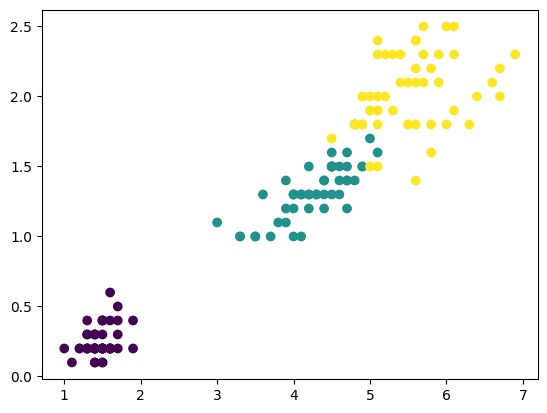

In [4]:
plt.scatter(X[:,0], X[:,1], c = y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


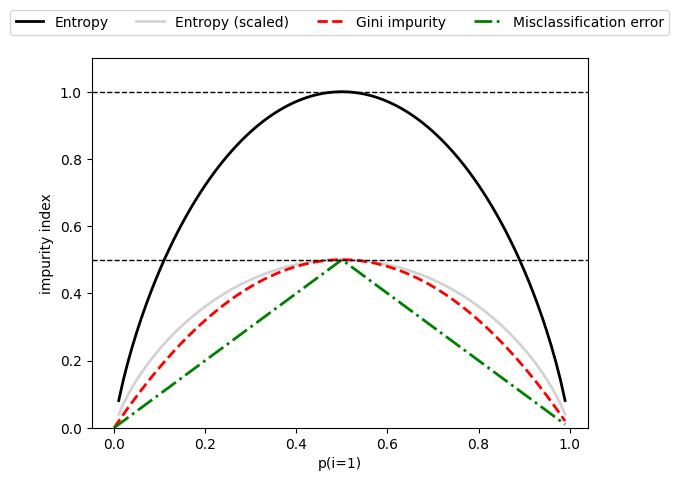

In [7]:
def gini(p):
  return p*(1 - p) + (1 - p)*(1 - (1-p))

def entropy(p):
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
  return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (scaled)', 'Gini impurity','Misclassification error'],
 ['-', '-', '--', '-.'], ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

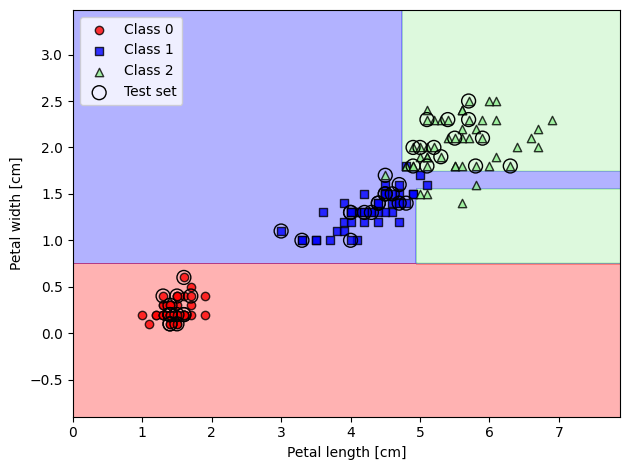

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

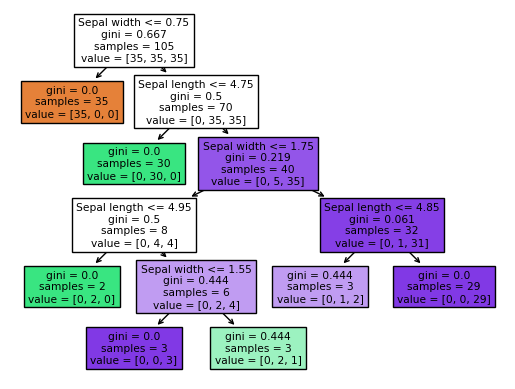

In [10]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

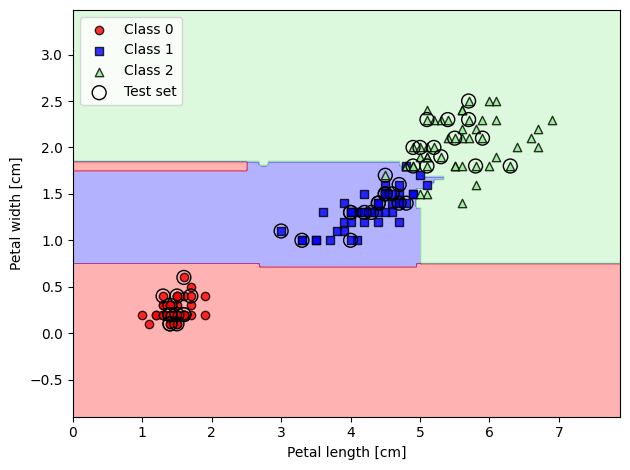

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=10, n_jobs=20)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Data mining oxide film growth

In [12]:
!gdown https://drive.google.com/uc?id=11ElMfAk8JZgczc3DpT9CIcnLiSPc2LlE

Downloading...
From: https://drive.google.com/uc?id=11ElMfAk8JZgczc3DpT9CIcnLiSPc2LlE
To: /content/database_combined_v3.csv
100% 791k/791k [00:00<00:00, 64.4MB/s]


In [13]:
from os import path, mkdir
import pandas as pd

In [14]:
#Define a simple function that takes care of average values
def avg_float(input_string):
    if type(input_string)==str:
        if 'AVG' in input_string:
            return float(input_string[4:])
        else:
            return float(input_string)
    else:
        return float(input_string)

In [15]:
#folder_path = r'.'
folder_path = r'/content/'
file_name = r'database_combined_v3.csv'

#Save the figures in a sub-folder called Figures.
try:
    mkdir(path.join(folder_path,'Figures'))
    figure_folder = path.join(folder_path,'Figures')
except FileExistsError:
    figure_folder = path.join(folder_path,'Figures')

#Here, we read in the entries from the csv file, noting the columns from which we wish to pull the data.

df1 = pd.read_csv(path.join(folder_path, file_name),
                  usecols= ['substrate', 'film_thickness(nm)', 'oxygen_pressure(mbar)',
                    'growth_temperature(C)','compound', 'repetition_rate(Hz)',
                            'fluence(J/cm2)','critical_magnetic_temperature(K)',
                       'critical_ferroelectric_temperature(K)', 'remnant_polarization(uC/cm2)'],
                 encoding = 'latin-1') #change encoding to latin-1 if utf-8 does not function correctly

# Fill missing values with zero
df1 = df1.fillna(0)

#Once we have the data, we wish to conver them to a dictionary with key-value pairs.
Films = {}

Films['oxygen_pressure'] = []
Films['film_thickness'] = []
Films['growth_temperature'] = []
Films['compound_grown'] = []
Films['substrate'] = []
Films['parent_compound'] = []
Films['fluence'] = []
Films['rep_rate'] = []
Films['tc-m'] = []
Films['tc-f'] = []
Films['polarization'] = []

#Fill dictionaries with lists representing data (non-zero values) on growth parameters and physical properties for each film

for r in range(df1.shape[0]):
    Films['oxygen_pressure'].append(avg_float(df1['oxygen_pressure(mbar)'][r]))
    Films['film_thickness'].append(avg_float(df1['film_thickness(nm)'][r]))
    Films['growth_temperature'].append(avg_float(df1['growth_temperature(C)'][r]))
    Films['rep_rate'].append(avg_float(df1['repetition_rate(Hz)'][r]))
    Films['fluence'].append(avg_float(df1['fluence(J/cm2)'][r]))
    Films['tc-m'].append(avg_float(df1['critical_magnetic_temperature(K)'][r]))
    Films['tc-f'].append(avg_float(df1['critical_ferroelectric_temperature(K)'][r]))
    Films['polarization'].append(avg_float(df1['remnant_polarization(uC/cm2)'][r]))

    compound_name = str(df1['compound'][r])

    #Because of variations in the way substrate names and compoudn names are given, we
    #decided to use 'parent' compound names to group similar entries.
    #the logic is extremely straightforward as seen in the statements below.

    if len(compound_name)>2:

        Films['compound_grown'].append(compound_name)

        if 'La' and 'Ca' in compound_name or 'LCMO' in compound_name:
            Films['parent_compound'].append('LCMO')

        elif 'La' and 'Sr' in compound_name or 'LSMO' in compound_name:
            Films['parent_compound'].append('LSMO')

        elif 'LMO' in compound_name or 'LaMnO3' in compound_name:
            Films['parent_compound'].append('LMO')

        elif 'Pb' in compound_name or 'Zr'  in compound_name or 'PZT' in compound_name:
            Films['parent_compound'].append('PZT')
        elif 'Bi' in compound_name or 'Fe' in compound_name or 'BFO' in compound_name:
            Films['parent_compound'].append('BFO')

        else:
            Films['compound_grown'].append('Unknown')
            Films['parent_compound'].append('Unknown')

        if 'SrTiO3' in str(df1['substrate'][r]) or 'STO' in str(df1['substrate'][r]):
            Films['substrate'].append('SrTiO3')
        elif 'LaAlO3' in str(df1['substrate'][r]) or 'LAO' in str(df1['substrate'][r]):
            Films['substrate'].append('LaAlO3')
        elif 'Si' in str(df1['substrate'][r]):
            Films['substrate'].append('Silicon')
        else:
            Films['substrate'].append('Other')


#Once we have the dictionary created, we can convert this to the pandas dataframe object
Film_m = {key: pd.DataFrame(value) for key,value in Films.items()}
Film_df = pd.concat(Film_m, axis=1)

#Show the dataframe
Film_df

,oxygen_pressure,film_thickness,growth_temperature,compound_grown,substrate,parent_compound,fluence,rep_rate,tc-m,tc-f,polarization
,0,0,0,0,0,0,0,0,0,0,0
0,0.2,400.0,550.0,PbZr0.52Ti0.48O3,LaAlO3,PZT,0.0,0.0,0.0,0.0,29.0
1,0.2,400.0,550.0,PbZr0.52Ti0.48O3,LaAlO3,PZT,0.0,0.0,0.0,0.0,17.0
2,0.2,400.0,550.0,PbZr0.52Ti0.48O3,LaAlO3,PZT,0.0,0.0,0.0,0.0,20.0
3,0.2,400.0,550.0,PbZr0.52Ti0.48O3,LaAlO3,PZT,0.0,0.0,0.0,0.0,31.0
4,0.2,400.0,550.0,"Pb(Zr,Ti)O3",LaAlO3,PZT,0.0,0.0,0.0,0.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...
565,NaN,NaN,NaN,La5/8Ca3/8MnO3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,NaN,NaN,NaN,La5/8Ca3/8MnO3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,NaN,NaN,NaN,La5/8Ca3/8MnO3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Decision Tree on Oxide Growth

Now let's apply decision tree to this data. First, we remove all NaNs, and select pressure, temperature, and compound columns. For convenience, we normalize polarization by 100.

In [16]:
Film_df1 = Film_df.dropna()
X = Film_df1[['oxygen_pressure',	'growth_temperature', 'parent_compound']].values
y = Film_df1[['polarization']].values/100.0

Then we wrangle the data a bit. Here, we
- select only values for PZT
- remove some outliers
- normalize growth temperature by 100 as well


In [17]:
X1 = X[X[:, 2] == 'PZT']
y = y[X[:, 2] == 'PZT']

y = y[X1[:, 0] < 1]
X1[:, 1] /= 100

filtered_data = X1[X1[:, 0] < 1]
X = filtered_data[:,0:2]

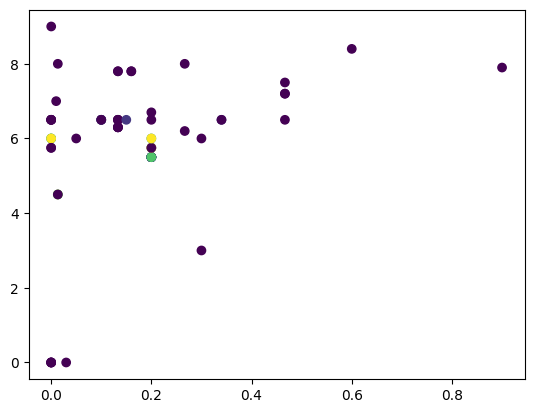

In [18]:
plt.scatter(X[:,0], X[:,1], c = y)

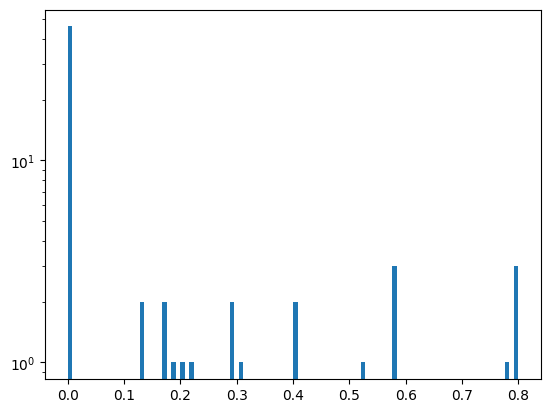

In [19]:
plt.hist(y, bins = 100, log = True);

Since decision tree requires cathegorical values, we make function that defines polarization values as small, medium, large

In [20]:
def categorize_array(arr, x1, x2, x3):
    result = []
    for value in arr:
        if value < x1:
            result.append(0)
        elif x1 <= value < x2:
            result.append(1)
        else:
            result.append(2)
    return np.array(result, dtype = int)

x1 = 0
x2 = 0.30
x3 = 0.70

output_array = categorize_array(y, x1, x2, x3)
#print(output_array)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, output_array, test_size=0.3, random_state=1)

In [22]:
print('Labels counts in y:', np.bincount(output_array))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 0 55 11]
Labels counts in y_train: [ 0 38  8]
Labels counts in y_test: [ 0 17  3]


In [23]:
X.shape, output_array.shape, X.dtype, output_array.dtype

((66, 2), (66,), dtype('O'), dtype('int64'))

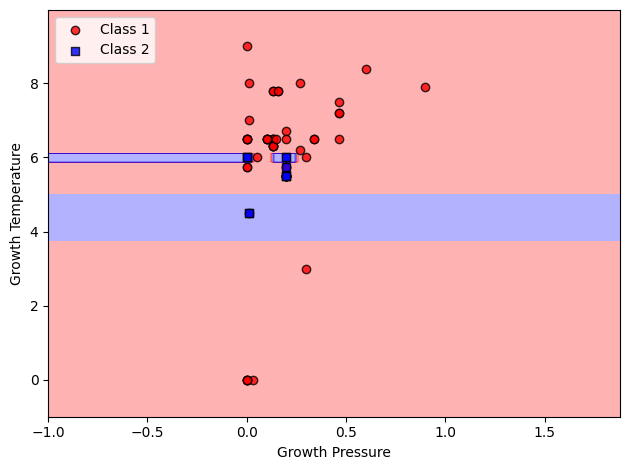

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model)
plt.xlabel('Growth Pressure')
plt.ylabel('Growth Temperature')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


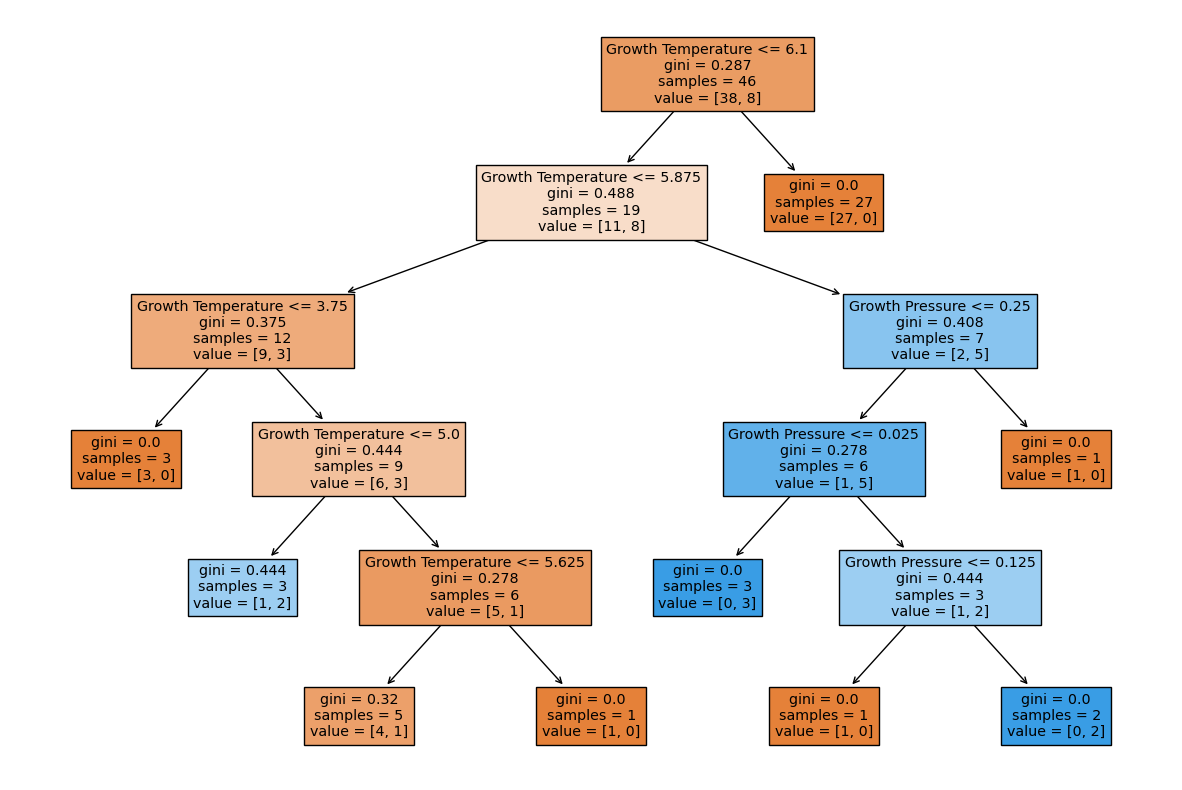

In [25]:
from sklearn import tree
feature_names = ['Growth Pressure', 'Growth Temperature']

plt.figure(figsize = (15,10))
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

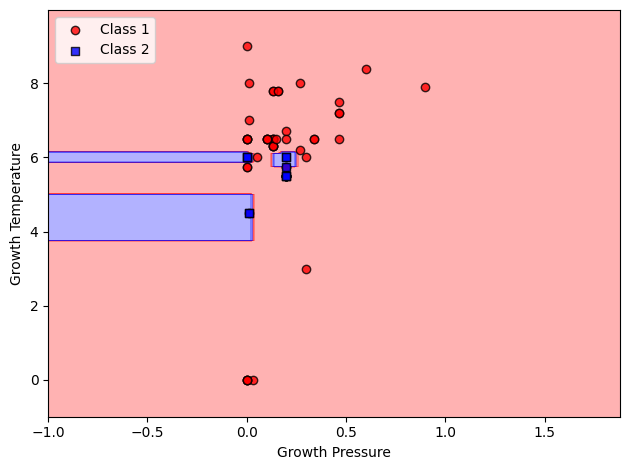

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=10, n_jobs=20)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest)
plt.xlabel('Growth Pressure')
plt.ylabel('Growth Temperature')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()